<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/05_Pet_Breeds/Loss_Func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from matplotlib import pyplot
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


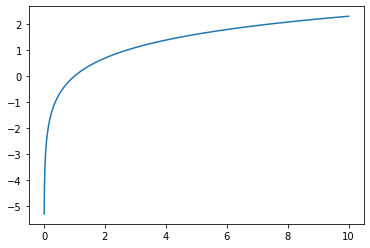

In [13]:
x = np.linspace(0,10,2000)
y = np.log(x)

pyplot.plot(x,y)